# Logistic regression
Credits: http://www.cookbook-r.com/ (Creative Commons Attribution-Share Alike 3.0 Unported License)

## Problem
You want to perform a logistic regression.

## Solution
A logistic regression is typically used when there is one dichotomous outcome variable (such as winning or losing), and a continuous predictor variable which is related to the probability or odds of the outcome variable. It can also be used with categorical predictors, and with multiple predictors.

Suppose we start with part of the built-in mtcars dataset. In the examples below, we’ll use vs as the outcome variable, mpg as a continuous predictor, and am as a categorical (dichotomous) predictor.

In [1]:
data(mtcars)
dat <- subset(mtcars, select=c(mpg, am, vs))
dat

,mpg,am,vs
Mazda RX4,21,1,0
Mazda RX4 Wag,21,1,0
Datsun 710,22.8,1,1
Hornet 4 Drive,21.4,0,1
Hornet Sportabout,18.7,0,0
Valiant,18.1,0,1
Duster 360,14.3,0,0
Merc 240D,24.4,0,1
Merc 230,22.8,0,1
Merc 280,19.2,0,1


### Continuous predictor, dichotomous outcome

If the data set has one dichotomous and one continuous variable, and the continuous variable is a predictor of the **probability** the dichotomous variable, then a logistic regression might be appropriate.

In this example, `mpg` is the continuous predictor variable, and `vs` is the dichotomous outcome variable.

In [2]:
# Do the logistic regression - both of these have the same effect.
# ("logit" is the default model when family is binomial.)
logr_vm <- glm(vs ~ mpg, data=dat, family=binomial)
logr_vm <- glm(vs ~ mpg, data=dat, family=binomial(link="logit"))

To view the model and information about it:

In [3]:
# Print information about the model
logr_vm


Call:  glm(formula = vs ~ mpg, family = binomial(link = "logit"), data = dat)

Coefficients:
(Intercept)          mpg  
    -8.8331       0.4304  

Degrees of Freedom: 31 Total (i.e. Null);  30 Residual
Null Deviance:	    43.86 
Residual Deviance: 25.53 	AIC: 29.53

In [4]:
# More information about the model
summary(logr_vm)


Call:
glm(formula = vs ~ mpg, family = binomial(link = "logit"), data = dat)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2127  -0.5121  -0.2276   0.6402   1.6980  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -8.8331     3.1623  -2.793  0.00522 **
mpg           0.4304     0.1584   2.717  0.00659 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.860  on 31  degrees of freedom
Residual deviance: 25.533  on 30  degrees of freedom
AIC: 29.533

Number of Fisher Scoring iterations: 6


### Plotting

The data and logistic regression model can be plotted with ggplot2 or base graphics:

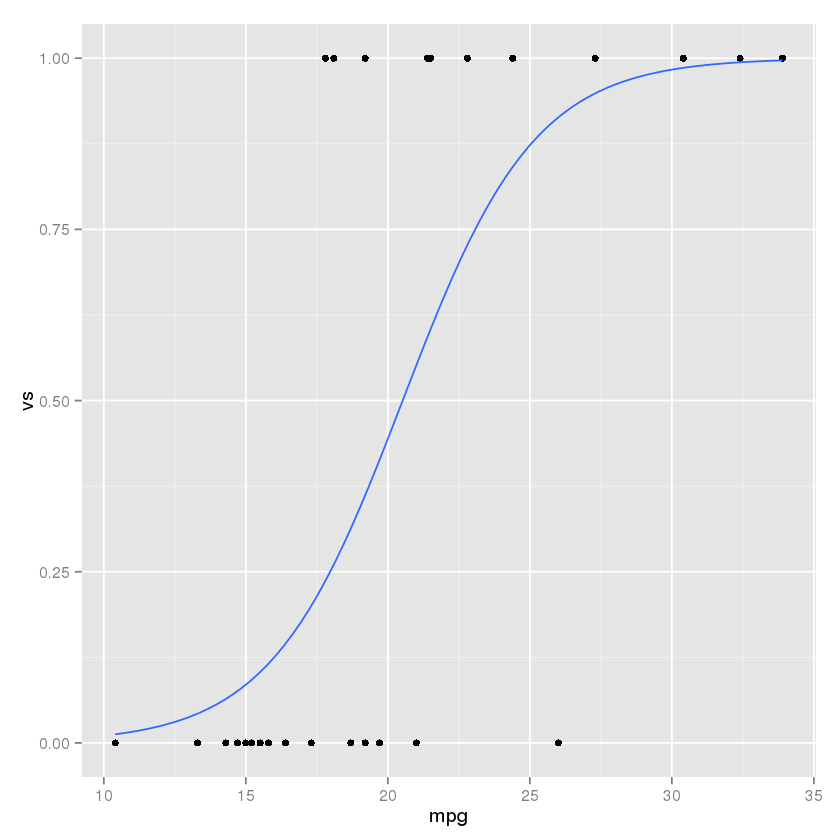

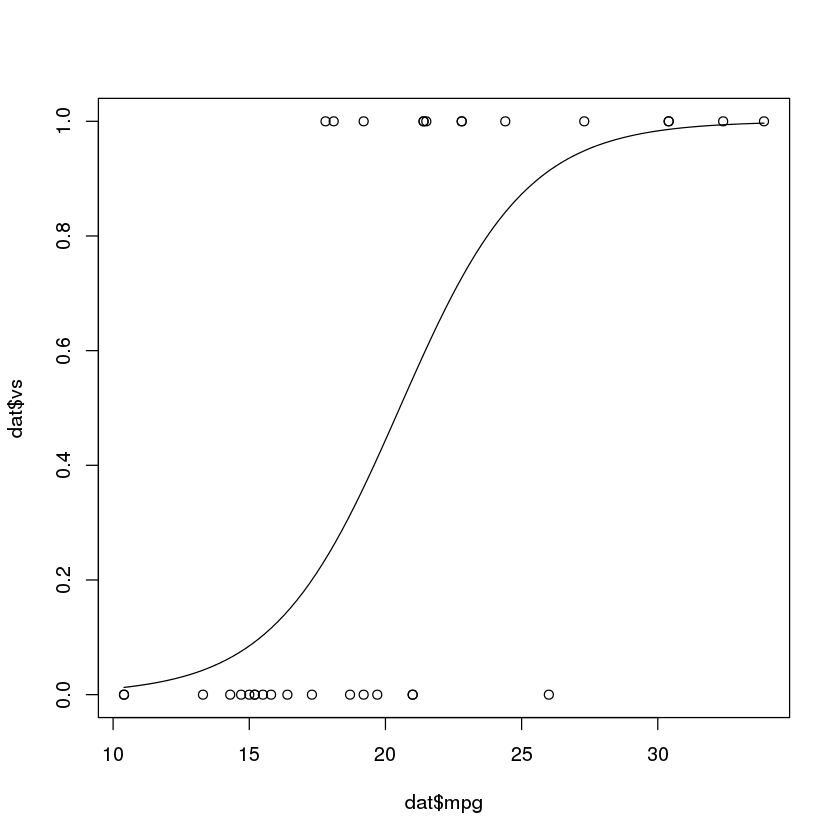

In [5]:
library(ggplot2)
ggplot(dat, aes(x=mpg, y=vs)) + geom_point() + 
  stat_smooth(method="glm", family="binomial", se=FALSE)


plot(dat$mpg, dat$vs)
curve(predict(logr_vm, data.frame(mpg=x), type="response"), add=TRUE) 

### Dichotomous predictor, dichotomous outcome

This proceeds in much the same way as above. In this example, `am` is the dichotomous predictor variable, and `vs` is the dichotomous outcome variable.

In [6]:
# Do the logistic regression
logr_va <- glm(vs ~ am, data=dat, family=binomial)

# Print information about the model
logr_va


Call:  glm(formula = vs ~ am, family = binomial, data = dat)

Coefficients:
(Intercept)           am  
    -0.5390       0.6931  

Degrees of Freedom: 31 Total (i.e. Null);  30 Residual
Null Deviance:	    43.86 
Residual Deviance: 42.95 	AIC: 46.95

In [7]:
# More information about the model
summary(logr_va)


Call:
glm(formula = vs ~ am, family = binomial, data = dat)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2435  -0.9587  -0.9587   1.1127   1.4132  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.5390     0.4756  -1.133    0.257
am            0.6931     0.7319   0.947    0.344

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.860  on 31  degrees of freedom
Residual deviance: 42.953  on 30  degrees of freedom
AIC: 46.953

Number of Fisher Scoring iterations: 4


### Plotting

The data and logistic regression model can be plotted with ggplot2 or base graphics, although the plots are probably less informative than those with a continuous variable. Because there are only 4 locations for the points to go, it will help to jitter the points so they do not all get overplotted.

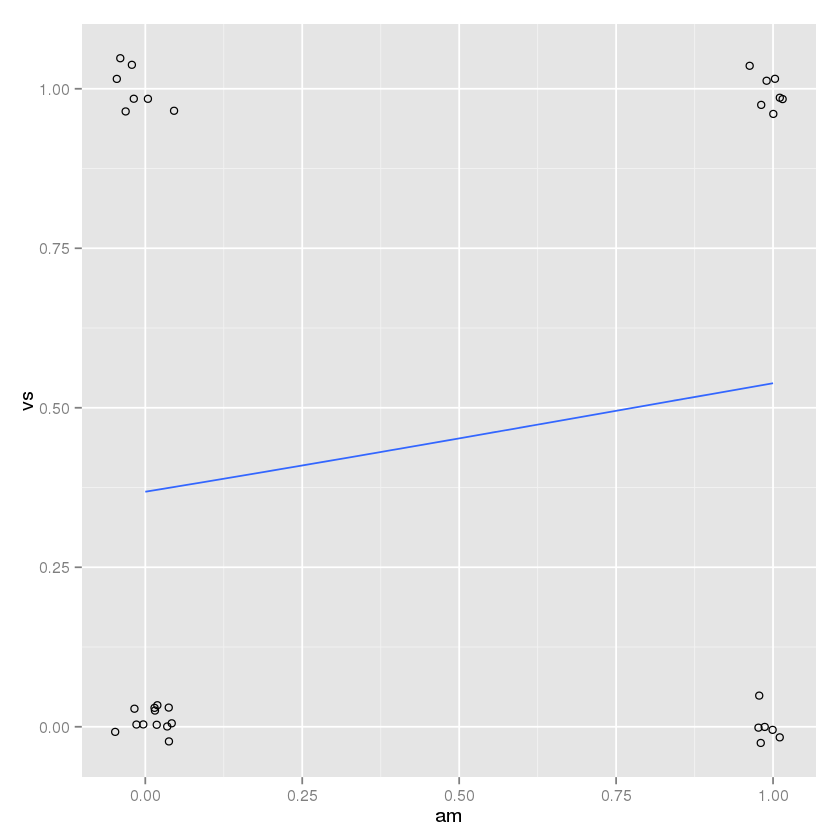

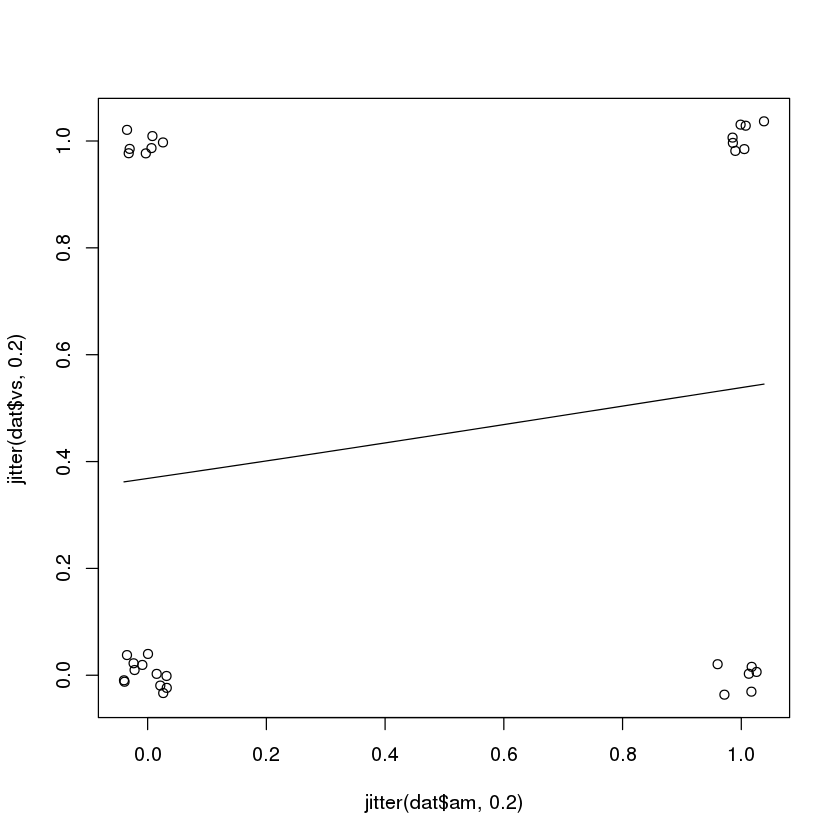

In [8]:
library(ggplot2)
ggplot(dat, aes(x=am, y=vs)) + 
  geom_point(shape=1, position=position_jitter(width=.05,height=.05)) + 
  stat_smooth(method="glm", family="binomial", se=FALSE)


plot(jitter(dat$am, .2), jitter(dat$vs, .2))
curve(predict(logr_va, data.frame(am=x), type="response"), add=TRUE) 

### Continuous and dichotomous predictors, dichotomous outcome

This is similar to the previous examples. In this example, `mpg` is the continuous predictor, `am` is the dichotomous predictor variable, and `vs` is the dichotomous outcome variable.

In [9]:
logr_vma <- glm(vs ~ mpg + am, data=dat, family=binomial)
logr_vma


Call:  glm(formula = vs ~ mpg + am, family = binomial, data = dat)

Coefficients:
(Intercept)          mpg           am  
   -12.7051       0.6809      -3.0073  

Degrees of Freedom: 31 Total (i.e. Null);  29 Residual
Null Deviance:	    43.86 
Residual Deviance: 20.65 	AIC: 26.65

In [10]:
summary(logr_vma)


Call:
glm(formula = vs ~ mpg + am, family = binomial, data = dat)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.05888  -0.44544  -0.08765   0.33335   1.68405  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -12.7051     4.6252  -2.747  0.00602 **
mpg           0.6809     0.2524   2.698  0.00697 **
am           -3.0073     1.5995  -1.880  0.06009 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.860  on 31  degrees of freedom
Residual deviance: 20.646  on 29  degrees of freedom
AIC: 26.646

Number of Fisher Scoring iterations: 6


### Multiple predictors with interactions

It is possible to test for interactions when there are multiple predictors. The interactions can be specified individually, as with `a + b + c + a:b + b:c + a:b:c`, or they can be expanded automatically, with `a * b * c`. It is possible to specify only a subset of the possible interactions, such as `a + b + c + a:c`.

This case proceeds as above, but with a slight change: instead of the formula being `vs ~ mpg + am`, it is `vs ~ mpg * am`, which is equivalent to `vs ~ mpg + am + mpg:am`.

In [11]:
# Do the logistic regression - both of these have the same effect.
logr_vmai <- glm(vs ~ mpg * am, data=dat, family=binomial)
logr_vmai <- glm(vs ~ mpg + am + mpg:am, data=dat, family=binomial)

In [12]:
logr_vmai


Call:  glm(formula = vs ~ mpg + am + mpg:am, family = binomial, data = dat)

Coefficients:
(Intercept)          mpg           am       mpg:am  
   -20.4784       1.1084      10.1055      -0.6637  

Degrees of Freedom: 31 Total (i.e. Null);  28 Residual
Null Deviance:	    43.86 
Residual Deviance: 19.12 	AIC: 27.12

In [13]:
summary(logr_vmai)


Call:
glm(formula = vs ~ mpg + am + mpg:am, family = binomial, data = dat)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.70566  -0.31124  -0.04817   0.28038   1.55603  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -20.4784    10.5525  -1.941   0.0523 .
mpg           1.1084     0.5770   1.921   0.0547 .
am           10.1055    11.9104   0.848   0.3962  
mpg:am       -0.6637     0.6242  -1.063   0.2877  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.860  on 31  degrees of freedom
Residual deviance: 19.125  on 28  degrees of freedom
AIC: 27.125

Number of Fisher Scoring iterations: 7
